<a href="https://colab.research.google.com/github/Shnagarsheth/HeatExchangerEstimationAlgorithm/blob/master/EKF%2BMLExtrapolation_HeatExchanger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Extended Kalman Filtering Algorithm
### Heat Exchanger Stochastic Dynamics 

Enter Input Flowrate of Cold Stream bet.n 0.002 to 0.00555 kg/s: 0.00277
Enter Input Flowrate of Hot Stream bet.n 0.009 to 0.02 kg/s: 0.00917
Enter Input Temperature of Cold Stream bet.n 280 to 305 K: 298
Enter Input Temperature of Hot Stream bet.n 345 to 360 K: 353
Enter Heat Transfer Coefficient: 280
Enter Cross-sectional Area of Cold Stream: 0.04
Enter Cross-sectional Area Hot Stream: 0.079
Enter mass Cold Stream: 0.04
Enter mass Hot Stream: 0.079
Specific Heat of Cold Stream: 4186
Specific Heat of Hot Stream: 4193
Noise Coefficient: 20


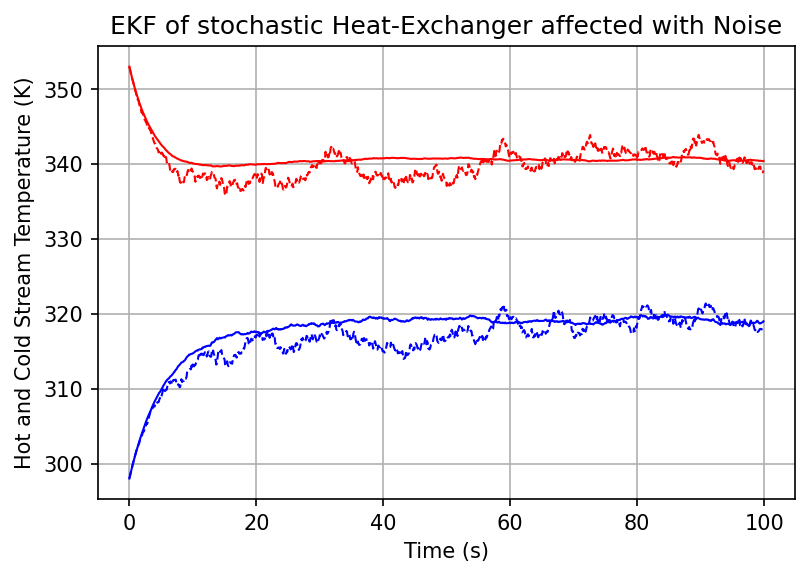

In [3]:
# Created by: Shaival Nagarsheth
# Details: V0.1 Extended Kalman Filtering Mean and Variance equation governing the dynamics of water tube heat exchanger via Euler–Maruyama method
# Date: 
# Version: 0.1

#Including libraries
import numpy as np
import matplotlib.pyplot as plt
import array as arr
import math

#Variable Declaration
N = 1000
T = 100
dt = T/N

#Noise Intensity
a1 = 0.0002
a2 = 0.0002
a3 = 0.0002
a4 = 0.0002

#Inputs and Outputs
fc   = float(input('Enter Input Flowrate of Cold Stream bet.n 0.002 to 0.00555 kg/s: '))
fh   = float(input('Enter Input Flowrate of Hot Stream bet.n 0.009 to 0.02 kg/s: '))
Tcin = int(input('Enter Input Temperature of Cold Stream bet.n 280 to 305 K: '))
Thin = int(input('Enter Input Temperature of Hot Stream bet.n 345 to 360 K: '))
h    = int(input('Enter Heat Transfer Coefficient: '))
Ac   = float(input('Enter Cross-sectional Area of Cold Stream: '))
Ah   = float(input('Enter Cross-sectional Area Hot Stream: '))
mc   = float(input('Enter mass Cold Stream: '))
mh   = float(input('Enter mass Hot Stream: '))
Cpc  = float(input('Specific Heat of Cold Stream: '))
Cph  = float(input('Specific Heat of Hot Stream: '))
r    = int(input('Noise Coefficient: '))

#Gaussian-Noise specificaitons for
mu,sd = 0,2

#Initialization
x1 = []
x2 = []

EMx1 = []
EMx2 = []

EP11=[]
EP12=[]
EP21=[]
EP22=[]

x1.append(298)
x2.append(353) 

EMx1.append(298)
EMx2.append(353)

EP11.append(1)
EP12.append(0)
EP21.append(0)
EP22.append(1)

for i in range(N-1):
  dW1=(np.random.normal(mu,sd))*(math.sqrt(dt))
  dW2=(np.random.normal(mu,sd))*(math.sqrt(dt))
  dW3=(np.random.normal(mu,sd))*(math.sqrt(dt))
  dW4=(np.random.normal(mu,sd))*(math.sqrt(dt))
  dV1=(np.random.normal(mu,sd))*(math.sqrt(dt))
  dV2=(np.random.normal(mu,sd))*(math.sqrt(dt))

  #Stochastic Dynamics (White Noise - Multiplicative in Nature)
  x1.append(x1[i]+(((((fc/mc)*(Tcin-x1[i]))+(((h*Ac)/(mc*Cpc))*(x2[i]-x1[i])))*dt)+((a1*((Tcin-x1[i])/mc))*dW1)+(a2*(fc/mc)*dW2))) #Dynamic stochastic differential equation of the Heat-Exchanger
  x2.append(x2[i]+(((((fh/mh)*(Thin-x2[i]))-(((h*Ah)/(mh*Cph))*(x2[i]-x1[i])))*dt)+((a3*((Thin-x2[i])/mh))*dW3)+(a4*(fh/mh)*dW4)))

  #Extended Kalman Filtering Mean Equations
  EMx1.append((EMx1[i]+((((fc/mc)*Tcin-(fc/mc)*EMx1[i])+(((h*Ac)/(mc*Cpc))*(EMx2[i]-EMx1[i])))*dt)+((EP11[i]*(r**(-2))*(((x1[i]*dt)+(r*dV1))-(EMx1[i]*dt))))+((EP12[i]*(r**(-2))*(((x2[i]*dt)+(r*dV2))-(EMx2[i]*dt)))))) 
  EMx2.append((EMx2[i]+((((fh/mh)*Thin-(fh/mh)*EMx2[i])-(((h*Ah)/(mh*Cph))*(EMx2[i]-EMx1[i])))*dt)+((EP12[i]*(r**(-2))*(((x1[i]*dt)+(r*dV1))-(EMx1[i]*dt))))+((EP22[i]*(r**(-2))*(((x2[i]*dt)+(r*dV2))-(EMx2[i]*dt))))))  

  #EKF Variance Equations
  EP11.append((EP11[i]+(((2*EP11[i]*((-fc/mc)-((h*Ac)/(mc*Cpc))))+(2*EP12[i]*((h*Ac)/(mc*Cpc)))+(((a1**2)*((Tcin**2)/(mc**2)))+(((fc/mc)**2)*(a2**2)))-(EP11[i]*EP11[i]*(r**(-2)))-(EP12[i]*EP12[i]*(r**(-2))))*dt))) 
  EP12.append((EP12[i]+(((EP11[i]*((h*Ah)/(mh*Cph)))+(EP12[i]*((-fh/mh)-((h*Ah)/(mh*Cph))))+(EP12[i]*((-fc/mc)-((h*Ac)/(mc*Cpc))))+(EP22[i]*((h*Ac)/(mc*Cpc)))-(EP11[i]*EP12[i]*(r**(-2)))-(EP12[i]*EP22[i]*(r**(-2))))*dt))) 
  EP21.append((EP12[i]+(((EP11[i]*((h*Ah)/(mh*Cph)))+(EP12[i]*((-fh/mh)-((h*Ah)/(mh*Cph))))+(EP12[i]*((-fc/mc)-((h*Ac)/(mc*Cpc))))+(EP22[i]*((h*Ac)/(mc*Cpc)))-(EP11[i]*EP12[i]*(r**(-2)))-(EP12[i]*EP22[i]*(r**(-2))))*dt))) 
  EP22.append((EP22[i]+(((2*EP12[i]*((h*Ah)/(mh*Cph)))+(2*EP22[i]*((-fh/mh)-((h*Ah)/(mh*Cph))))+(((a3**2)*((Thin**2)/(mc**2)))+(((fh/mh)**2)*(a4**2)))-(EP12[i]*EP12[i]*(r**(-2)))-(EP22[i]*EP22[i]*(r**(-2))))*dt))) 
   
t = np.arange(0,100,dt)

#fig, (ax0, ax1) = plt.subplots(2, 1)
#ax0.plot(t,x1,'b',linewidth=2.0)
#ax1.plot(t,x2,'r--',linewidth=2.0)

plt.figure(dpi=150)
plt.plot(t,x2,'r',linewidth=1.0)
plt.plot(t,x1,'b',linewidth=1.0)
plt.plot(t,EMx2,'r--',linewidth=1.0)
plt.plot(t,EMx1,'b--',linewidth=1.0)
plt.title('EKF of stochastic Heat-Exchanger affected with Noise')
plt.xlabel('Time (s)')
plt.ylabel('Hot and Cold Stream Temperature (K)')
plt.grid(True)
plt.show()

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from google.colab import files

dict = {'Time': t, 'Hot_Temp': EMx2, 'Cold_Temp': EMx1} 

df = pd.DataFrame(dict)
  
# saving the dataframe
df.to_csv('TempHX.csv')
files.download('TempHX.csv')

#poly = PolynomialFeatures(degree = 4)
#X_poly = poly.fit_transform(t)
#poly=LinearRegression()
#poly = poly.fit(X_poly, EMx1)

#plt.scatter(t, EMx1, color = 'black')
#plt.plot(t, poly.predict(poly.fit_transform(t)), color = 'red')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

dataset = pd.read_csv('TempHX.csv')
dataset.head(5)

X=dataset.iloc[50:,1:2] #taking timeStamps  
y=dataset.iloc[50:,2]  #taking Hot_Stream temperature

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

poly = PolynomialFeatures(degree = 8)
X_poly = poly.fit_transform(X)
pol=LinearRegression()
pol.fit(X_poly, y)

def viz_polynomial():
  plt.scatter(X, y, color = 'red',marker = ".", linewidths = 0.5)
  plt.plot(X, pol.predict(poly.fit_transform(X)), color = 'black')
  plt.title('polynomial regression for Hot-Stream')
  plt.xlabel('time')
  plt.ylabel('Hot-Stream Temp(K)')
  plt.show()
  return

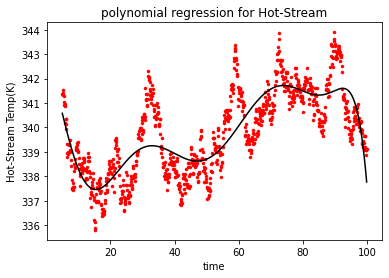

In [28]:
#viz_linear()
viz_polynomial()

In [ ]:
X1=dataset.iloc[37:,1:2] #taking timeStamps  
y1=dataset.iloc[37:,3]  #taking Hot_Stream temperature

37     307.910080
38     308.192100
39     308.099596
40     308.204861
41     308.013639
          ...    
995    320.097311
996    319.859210
997    320.244414
998    319.999877
999    320.121042
Name: Cold_Temp, Length: 963, dtype: float64